# DSCI 100 Term Project: Final Report


## Introduction 
---

### Contributors (Group 010-5)

- Abdullah Al Zahid — 58730219
- Benson Huang — 21936661
- Katja Radovic-Jonsson — 39575964
- Millie Sun — 19927367

### Purpose
This project revolves around data collected by a research group in Computer Science at UBC, led by Frank Wood, surrounding how people play video games. The research team has set up a Minecraft server—which they call PLAICraft—that records players' actions as they navigate through the world. This project seeks to analyze the team's data to assist the researchers in targeting their recruitment efforts to the right audiences.

### Question

In this project, we are analyzing the data to answer the question: **Can a player's age predict the number of hours they spend playing PLAIcraft?**

### Analyzing the Dataset

To answer this question, we will be using data from the provided `players.csv` data set—specifically, we will need the `Age` and `played_hours` variables.

First, we load in the data.

In [49]:
library(tidyverse)

In [50]:
players <- read_csv("https://raw.githubusercontent.com/katjarj/dsci-100-project/refs/heads/main/players.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [51]:
head(players)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


Observing the `players.csv` data frame, we see that is has the following characteristics:

**Rows (observations):** 196 

**Columns (variables):** 7 

**Variable names:** 
- `experience` \<chr>: the level of Minecraft experience of the player
- `subscribe` \<lgl>: whether the player is subscribed
- `hashedEmail` \<chr>: a unique token given to the user based on their email
- `played_hours` \<dbl>: number of hours played
- `name` \<chr>: player's name
- `gender` \<chr>: player's gender
- `Age` \<dbl>: player's age

**Potential issues:**
- The `experience` column is a subjective measure of how advanced the player is—we don't know how accurate the values are.
- We don't know the order in which the experience categories are sorted. For example, does Pro come before Veteran? We have no way of knowing.
- There are some missing values in the `Age` data, which I will have to remove for my calculations.

We can now compute summary statistics on each of the numeric columns, removing NA values as needed:

---

### factorize categorical varibles -> convert to numeric -> spearman corelation

In [52]:
head(players)
players$experience_num <- factor(players$experience, levels = c('Beginner', 'Amateur', 'Regular', 'Veteran', 'Pro')) |>
as.numeric()
players$subscribe_num <- factor(players$subscribe, levels = c(FALSE, TRUE)) |>
as.numeric()
players$gender_num <- factor(players$gender) |> as.numeric()

cor(players |> select(played_hours, experience_num, subscribe_num, Age, gender_num) |> drop_na(), method = "spearman")

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


,played_hours,experience_num,subscribe_num,Age,gender_num
played_hours,1.00000000,0.00280288,0.12520101,0.03104879,-0.12287419
experience_num,0.00280288,1.00000000,-0.04429266,-0.11140675,0.17654233
subscribe_num,0.12520101,-0.04429266,1.00000000,-0.20071559,-0.14592100
Age,0.03104879,-0.11140675,-0.20071559,1.00000000,-0.07325171
gender_num,-0.12287419,0.17654233,-0.14592100,-0.07325171,1.00000000


In [53]:
summary_stats_players <- players |>
    summarize(avg_played_hours = mean(played_hours),
              max_played_hours = max(played_hours),
              min_played_hours = min(played_hours),
              avg_age = mean(Age, na.rm = TRUE),
              max_age = max(Age, na.rm = TRUE),
              min_age = min(Age, na.rm = TRUE))
summary_stats_players

avg_played_hours,max_played_hours,min_played_hours,avg_age,max_age,min_age
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5.845918,223.1,0,20.52062,50,8


We can now see that the mean, maximum, and minimum values of `played_hours` are 5.845918, 223.1, and 0, respectively.

## Methods
---

In order to understand how we need to analyze the data, we need to clean and wrangle the data and perform an exploratory analysis on it.

### Wrangling

We begin by wrangling the data such that it can be easily visualized and analyzed.

In [54]:
players_wrangled <- players |>
    rename(age = Age) |>
    drop_na()
head(players_wrangled)

experience,subscribe,hashedEmail,played_hours,name,gender,age,experience_num,subscribe_num,gender_num
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,5,2,3
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,4,2,3
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,4,1,3
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,2,2,2
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,3,2,3
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,2,2,2


We did this by renaming `Age` to `age` for better consistency, and omitting NA values in the data.

The `players.csv` data is now ready for visualization.

### Exploratory Visualization

To explore this data set, we created a scatter plot of the players' ages and their respective time spent playing the game.

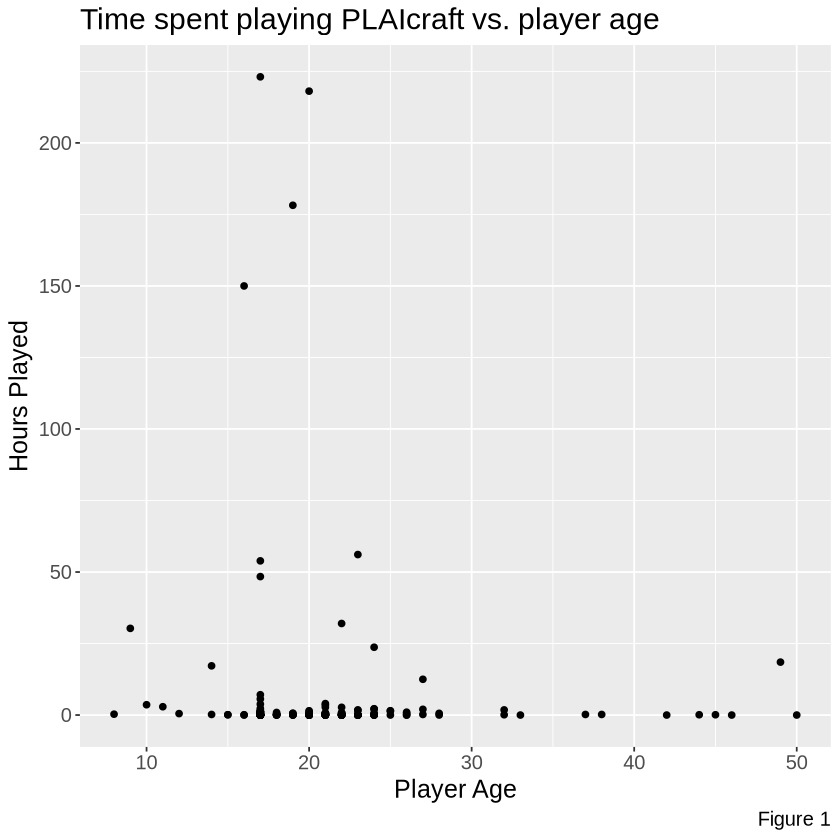

In [55]:
players_plot <- players_wrangled |>
    ggplot(aes(x = age, y = played_hours)) +
    geom_point() +
    xlab("Player Age") +
    ylab("Hours Played") +
    labs(caption = "Figure 1") +
    ggtitle("Time spent playing PLAIcraft vs. player age") +
    theme(text = element_text(size = 15))
players_plot

We can see from Figure 1 that there is a large spike in the number of hours played somewhere between ages 15 and 20. 

We also created a histogram of the distribution of player ages across the data set, which gives us a better idea of how the data is skewed.

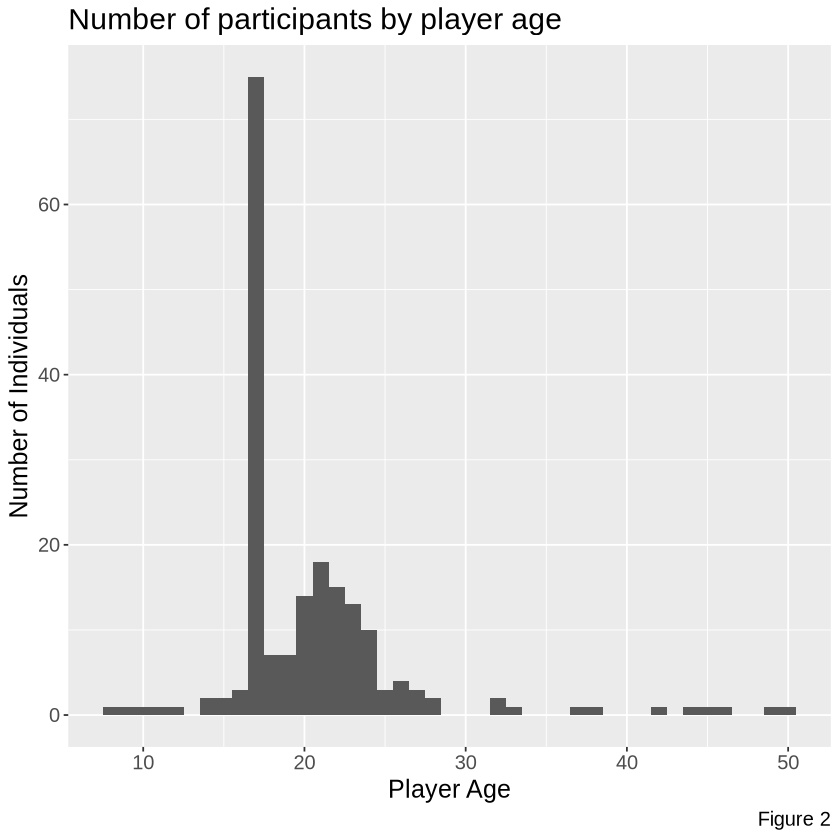

In [7]:
players_hist <- players_wrangled |>
    ggplot(aes(x = age)) +
    geom_histogram(binwidth = 1) +
    xlab("Player Age") +
    ylab("Number of Individuals") +
    labs(caption = "Figure 2") + 
    ggtitle("Number of participants by player age") +
    theme(text = element_text(size = 15))
players_hist

Figure 2 tells us that there is significantly more data from users around the age of 17. This is something we may need to consider when performing our data analysis.

### Data Analysis

Due to the nonlinear, numerical nature of the data we're trying to find, we decided to use KNN regression for our data analysis. We first set a seed for reproducibility purposes, then perform the analysis.

In [56]:
library(tidymodels)

# Set seed for reproducibility
set.seed(123)

# Split data into training (75%) and testing (25%) sets.
# Stratify by played_hours to maintain a similar distribution in both sets.
player_split <- initial_split(players_wrangled, prop = 0.75, strata = played_hours)
player_train <- training(player_split)
player_test <- testing(player_split)

# Create a recipe to preprocess the data.
# Here we center and scale the predictor 'age'.
player_recipe <- recipe(played_hours ~ age, data = player_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

# Model Specification with Tuning
player_spec <- nearest_neighbor(weight_func = "rectangular",
                              neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("regression")

# Resampling Strategy
player_vfold <- vfold_cv(player_train, v = 5, strata = played_hours)

# Create Workflow
player_wkflw <- workflow() |>
  add_recipe(player_recipe) |>
  add_model(player_spec)

player_wkflw

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [57]:
# Model Tuning
gridvals <- tibble(neighbors = seq(from = 1, to = 110, by = 3))

# Collect RMSE metrics from tuning results
player_results <- player_wkflw |>
  tune_grid(resamples = player_vfold, grid = gridvals) |>
  collect_metrics() |>
  filter(.metric == "rmse")

player_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,20.06239,5,8.929273,Preprocessor1_Model01
4,rmse,standard,19.64701,5,9.119005,Preprocessor1_Model02
7,rmse,standard,21.93975,5,8.424576,Preprocessor1_Model03
10,rmse,standard,21.43437,5,8.461320,Preprocessor1_Model04
13,rmse,standard,20.99319,5,8.635296,Preprocessor1_Model05
16,rmse,standard,21.17683,5,8.516520,Preprocessor1_Model06
19,rmse,standard,20.87253,5,8.624163,Preprocessor1_Model07
22,rmse,standard,20.83291,5,8.610842,Preprocessor1_Model08
25,rmse,standard,20.75991,5,8.627003,Preprocessor1_Model09


In [58]:
# show only the row of minimum RMSPE
player_min <- player_results |>
  filter(mean == min(mean))

player_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
4,rmse,standard,19.64701,5,9.119005,Preprocessor1_Model02


In [59]:
# Extract the best number of neighbors (k) that minimizes the RMSE
kmin <- player_min |> pull(neighbors)

# Final Model Training
player_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = kmin) |>
  set_engine("kknn") |>
  set_mode("regression")

# Fit the final workflow on the training data
player_fit <- workflow() |>
  add_recipe(player_recipe) |>
  add_model(player_spec) |>
  fit(data = player_train)

# Model Evaluation on Test Data
player_summary <- player_fit |>
  predict(player_test) |>
  bind_cols(player_test) |>
  metrics(truth = played_hours, estimate = .pred) |>
  filter(.metric %in% c('rmse', 'rsq'))

player_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,3.378759e+01
rsq,standard,4.100538e-04


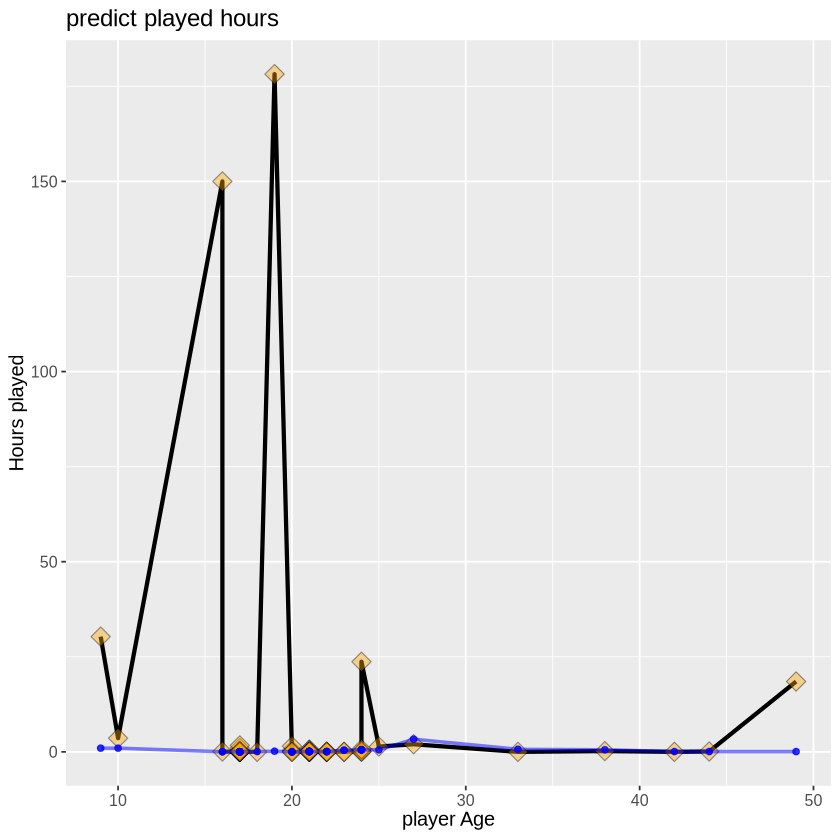

In [60]:
# Generate Prediction Grid for Visualization
played_hours_prediction_grid <- tibble(
    age = seq(
        from = players_wrangled |> pull(age) |> min(na.rm = TRUE),
        to = players_wrangled |> pull(age) |> max(na.rm = TRUE),
    )
)

player_preds <- player_fit |>
  predict(played_hours_prediction_grid) |>
  bind_cols(played_hours_prediction_grid)

# Plot Actual Data and Predictions
# plot_final <- ggplot(players_wrangled, aes(x = age, y = played_hours)) +
#   geom_point(alpha = 0.4) +
#   geom_line(data = player_preds,
#             mapping = aes(x = age, y = .pred),
#             color = "steelblue", 
#             linewidth = 1) +
#   geom_point(data = player_preds,
#             mapping = aes(x = age, y = .pred),
#             color = "steelblue") + 
#   xlab("player Age") +
#   ylab("Hours played") +
#   ggtitle("predict played hours") +
#   theme(text = element_text(size = 12))

# plot_final

player_preds <- player_fit |>
  predict(player_test %>% select(age) %>% tibble()) |>
  bind_cols(player_test %>% select(age) %>% tibble())

plot_final <- ggplot(player_test, aes(x = age, y = played_hours)) + 
  geom_line(color = "black", 
           linewidth = 1.2) +
  geom_point(alpha = 0.4, 
            fill = "orange", 
            shape = 23, 
            size = 4) +

  geom_line(data = player_preds,
            mapping = aes(x = age, y = .pred),
            color = "blue",
            alpha = 0.5, 
            linewidth = 1) +
 geom_point(data = player_preds,
            mapping = aes(x = age, y = .pred),
            color = "blue", 
            alpha = 0.8) + 
  xlab("player Age") +
  ylab("Hours played") +
  ggtitle("predict played hours") +
  theme(text = element_text(size = 12))
plot_final

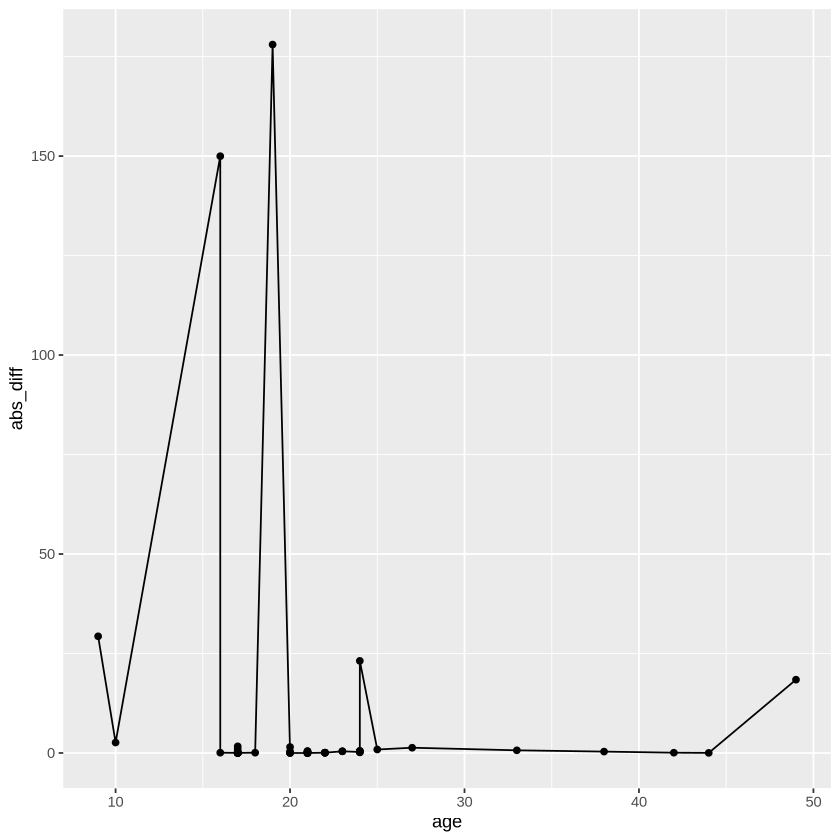

In [61]:
# head(player_preds)
# head(player_test) |> 
# select(played_hours, age)
cbind(player_preds, player_test |> select(played_hours)) |> 
mutate(abs_diff = abs(.pred - played_hours)) |>
ggplot(aes(x = age, y = abs_diff)) + 
    geom_line() +
    geom_point()

In [62]:
mean(player_preds$.pred)

[1] 0.2581633

---

## Model 2: Age + subscribe

In [85]:
head(player_train)
# Create a recipe to preprocess the data.
# Here we center and scale the predictor 'age'.
model2_recipe <- recipe(played_hours ~ age + subscribe_num, data = player_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

# Model Specification with Tuning
model2_spec <- nearest_neighbor(weight_func = "rectangular",
                              neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("regression")

# Resampling Strategy
model2_vfold <- vfold_cv(player_train, v = 5, strata = played_hours)

# Create Workflow
model2_wkflw <- workflow() |>
  add_recipe(model2_recipe) |>
  add_model(model2_spec)

model2_wkflw

experience,subscribe,hashedEmail,played_hours,name,gender,age,experience_num,subscribe_num,gender_num
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19,3,2,2
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21,2,1,3
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17,2,2,3
Veteran,TRUE,bbe2d83de678f519c4b3daa7265e683b4fe2d814077f9094afd11d8f217039ec,0.0,Nyla,Female,22,4,2,2
Pro,TRUE,4caa42e1b20511552434978171dcf7283fb6eb857eb871327e39bfc328002309,0.0,Daniela,Male,17,5,2,3
Veteran,TRUE,6f9acf8ea9956fe817895c78d10e1e25c11aba335a451e5b0322b073ee5008c4,0.0,Niamh,Non-binary,17,4,2,4


══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [86]:
# Model Tuning
model2_grid <- tibble(neighbors = seq(from = 1, to = 30, by = 3))

# Collect RMSE metrics from tuning results
model2_results <- model2_wkflw |>
  tune_grid(resamples = model2_vfold, grid = model2_grid) |>
  collect_metrics() |>
  filter(.metric == "rmse") |>
  arrange(mean)

model2_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,20.22682,5,9.306183,Preprocessor1_Model01
28,rmse,standard,21.30763,5,8.544066,Preprocessor1_Model10
25,rmse,standard,21.44317,5,8.524832,Preprocessor1_Model09
19,rmse,standard,21.49023,5,8.619436,Preprocessor1_Model07
22,rmse,standard,21.52976,5,8.613967,Preprocessor1_Model08
16,rmse,standard,21.88942,5,8.512792,Preprocessor1_Model06
13,rmse,standard,22.26546,5,8.349759,Preprocessor1_Model05
4,rmse,standard,22.57877,5,8.434410,Preprocessor1_Model02
10,rmse,standard,22.64809,5,8.227729,Preprocessor1_Model04


In [87]:
# Final Model Training
model2_tuned_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 1) |>
  set_engine("kknn") |>
  set_mode("regression")

# Fit the final workflow on the training data
model2_fit <- workflow() |>
  add_recipe(model2_recipe) |>
  add_model(model2_tuned_spec) |>
  fit(data = player_train)

# Model Evaluation on Test Data
model2_summary <- model2_fit |>
  predict(player_test) |>
  bind_cols(player_test) |>
  metrics(truth = played_hours, estimate = .pred) |>
  filter(.metric %in% c('rmse', 'rsq'))

model2_summary
player_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,33.862519163
rsq,standard,0.004001561


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,3.378759e+01
rsq,standard,4.100538e-04


---

## Model 3: age + subscribe + gender

In [88]:
head(player_train)
# Create a recipe to preprocess the data.
# Here we center and scale the predictor 'age'.
model3_recipe <- recipe(played_hours ~ age + subscribe_num + gender_num, data = player_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

# Model Specification with Tuning
model3_spec <- nearest_neighbor(weight_func = "rectangular",
                              neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("regression")

# Resampling Strategy
model3_vfold <- vfold_cv(player_train, v = 5, strata = played_hours)

# Create Workflow
model3_wkflw <- workflow() |>
  add_recipe(model3_recipe) |>
  add_model(model3_spec)

model3_wkflw

experience,subscribe,hashedEmail,played_hours,name,gender,age,experience_num,subscribe_num,gender_num
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19,3,2,2
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21,2,1,3
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17,2,2,3
Veteran,TRUE,bbe2d83de678f519c4b3daa7265e683b4fe2d814077f9094afd11d8f217039ec,0.0,Nyla,Female,22,4,2,2
Pro,TRUE,4caa42e1b20511552434978171dcf7283fb6eb857eb871327e39bfc328002309,0.0,Daniela,Male,17,5,2,3
Veteran,TRUE,6f9acf8ea9956fe817895c78d10e1e25c11aba335a451e5b0322b073ee5008c4,0.0,Niamh,Non-binary,17,4,2,4


══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [80]:
# Model Tuning
model3_grid <- tibble(neighbors = seq(from = 1, to = 30, by = 3))

# Collect RMSE metrics from tuning results
model3_results <- model3_wkflw |>
  tune_grid(resamples = model3_vfold, grid = model3_grid) |>
  collect_metrics() |>
  filter(.metric == "rmse") |>
  arrange(mean)

model3_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
22,rmse,standard,22.09753,5,8.082572,Preprocessor1_Model08
19,rmse,standard,22.38779,5,8.099301,Preprocessor1_Model07
16,rmse,standard,22.56750,5,8.049469,Preprocessor1_Model06
25,rmse,standard,22.75612,5,7.776201,Preprocessor1_Model09
28,rmse,standard,22.82383,5,7.767063,Preprocessor1_Model10
13,rmse,standard,22.93130,5,7.912006,Preprocessor1_Model05
10,rmse,standard,23.04654,5,7.925317,Preprocessor1_Model04
7,rmse,standard,24.16370,5,7.548043,Preprocessor1_Model03
4,rmse,standard,24.73801,5,7.538398,Preprocessor1_Model02


In [90]:
# Final Model Training
model3_tuned_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 22) |>
  set_engine("kknn") |>
  set_mode("regression")

# Fit the final workflow on the training data
model3_fit <- workflow() |>
  add_recipe(model3_recipe) |>
  add_model(model3_tuned_spec) |>
  fit(data = player_train)

# Model Evaluation on Test Data
model3_summary <- model3_fit |>
  predict(player_test) |>
  bind_cols(player_test) |>
  metrics(truth = played_hours, estimate = .pred) |>
  filter(.metric == 'rmse')

player_summary
model2_summary
model3_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,3.378759e+01
rsq,standard,4.100538e-04


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,33.862519163
rsq,standard,0.004001561


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,33.533182754
rsq,standard,0.003306665


,Age,age,gender_num,subscribe_num,test_set,age + subscribe,age + subscribe + gender
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.975,9,3,2,30.3,0.3,0.9909091
2,0.025,17,3,1,0.0,0.1,0.6681818
3,0.100,21,3,2,0.1,0.7,4.4000000
4,0.025,17,2,2,0.0,0.0,2.5636364
5,0.075,22,3,1,0.0,2.7,0.9136364
6,0.025,17,2,2,0.0,0.0,2.5636364


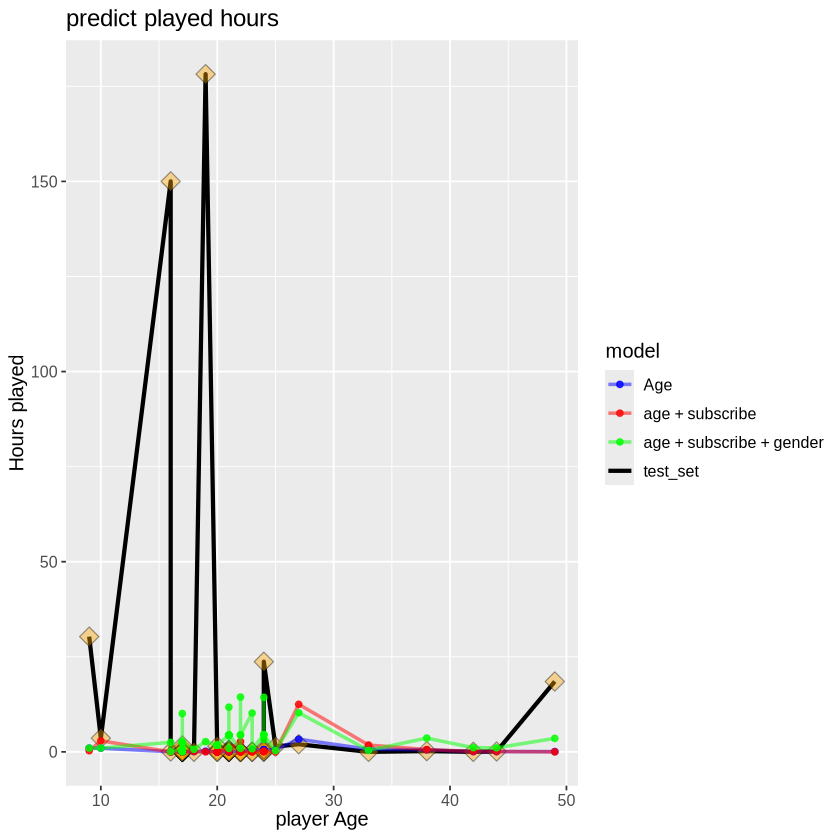

In [104]:
player_preds <- player_fit |>
  predict(player_test %>% select(age)) |>
  bind_cols(player_test %>% select(age, gender_num, subscribe_num, played_hours)) |> 
  rename(Age = .pred, test_set = played_hours)
# player_preds

model2_preds <- model2_fit |>
  predict(player_test) |>
  rename(`age + subscribe` = .pred)
# model2_preds

model3_preds <- model3_fit |>
  predict(player_test) |>
  rename(`age + subscribe + gender` = .pred)
# model3_preds

final_preds <- cbind(player_preds, model2_preds) |> cbind(model3_preds)
head(final_preds)

plot_final <- ggplot(final_preds, aes(x = age, y = test_set)) + 
  geom_line(aes(color = "test_set"), 
           linewidth = 1.2) +
  geom_point(alpha = 0.4, 
            fill = "orange", 
            shape = 23, 
            size = 4) +

  geom_line(aes(x = age, y = Age, color = "Age"),
            alpha = 0.5, 
            linewidth = 1) +
 geom_point(aes(x = age, y = Age, color = "Age"), 
            alpha = 0.8) + 

  geom_line(aes(x = age, y = `age + subscribe`, color = "age + subscribe"),
            alpha = 0.5, 
            linewidth = 1) +
 geom_point(aes(x = age, y = `age + subscribe`,color = "age + subscribe"), 
            alpha = 0.8) + 

  geom_line(aes(x = age, y = `age + subscribe + gender`, color = "age + subscribe + gender"),
            alpha = 0.5, 
            linewidth = 1) +
 geom_point(aes(x = age, y = `age + subscribe + gender`, color = "age + subscribe + gender"),
            alpha = 0.8) + 
  scale_color_manual(values = c("test_set" = "black", "Age" = "blue", "age + subscribe" = "red", "age + subscribe + gender" = "green")) + 
  labs(title = "predict played hours", x = "player Age", y = "Hours played", color = "model") + 
  theme(text = element_text(size = 12))
plot_final